# 신용카드 사용자 연체 예측 AI 경진대회

### 데이터 설명
- `train.csv`: 신용카드 사용자들의 개인 신상정보 (26457, 20)   
- `test.csv`: credit 열 미포함 (10000, 19)   
- `sample_submission.csv`: 정답 제출 파일 (10000, 4)

### 데이터 변수 설명
- `index`
- `gender`: 성별
- `car`: 차량 소유 여부
- `reality`: 부동산 소유 여부
- `child_num`: 자녀 수
- `income_total`: 연간 소득
- `income_type`: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- `edu_type`: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- `family_type`: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- `house_type`: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- `DAYS_BIRTH`: 출생일 (데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미)
- `DAYS_EMPLOYED`: 업무 시작일 (데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미, 양수 값은 고용되지 않은 상태를 의미함)
- `FLAG_MOBIL`: 핸드폰 소유 여부
- `work_phone`: 업무용 전화 소유 여부
- `phone`: 전화 소유 여부
- `email`: 이메일 소유 여부
- `occyp_type`: 직업 유형													
- `family_size`: 가족 규모
- `begin_month`: 신용카드 발급 월 (데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미)
- `credit`: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함)

In [1]:
import os
root_dir = '../../' if os.getcwd().split('/')[-1] != 'credit-now' else './'
os.chdir(root_dir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import font_family
font_family.set_font_family()

In [2]:
df = pd.read_csv('original_data/train.csv')
df.head()

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

## Data Info

In [3]:
df.describe()

index     child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  \
count  26457.000000  26457.000000  2.645700e+04  26457.000000   26457.000000   
mean   13228.000000      0.428658  1.873065e+05 -15958.053899   59068.750728   
std     7637.622372      0.747326  1.018784e+05   4201.589022  137475.427503   
min        0.000000      0.000000  2.700000e+04 -25152.000000  -15713.000000   
25%     6614.000000      0.000000  1.215000e+05 -19431.000000   -3153.000000   
50%    13228.000000      0.000000  1.575000e+05 -15547.000000   -1539.000000   
75%    19842.000000      1.000000  2.250000e+05 -12446.000000    -407.000000   
max    26456.000000     19.000000  1.575000e+06  -7705.000000  365243.000000   

       FLAG_MOBIL    work_phone         phone         email   family_size  \
count     26457.0  26457.000000  26457.000000  26457.000000  26457.000000   
mean          1.0      0.224742      0.294251      0.091280      2.196848   
std           0.0      0.417420      0.455714      0.288013      0.916717   
min           1.0      0.000000      0.000000      0.000000      1.000000   
25%           1.0      0.000000      0.000000      0.000000      2.000000   
50%           1.0      0.000000      0.000000      0.000000      2.000000   
75%           1.0      0.000000      1.000000      0.000000      3.000000   
max           1.0      1.000000      1.000000      1.000000     20.000000   

        begin_month        credit  
count  26457.000000  26457.000000  
mean     -26.123294      1.519560  
std       16.559550      0.702283  
min      -60.000000      0.000000  
25%      -39.000000      1.000000  
50%      -24.000000      2.000000  
75%      -12.000000      2.000000  
max        0.000000      2.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

## EDA Visualization

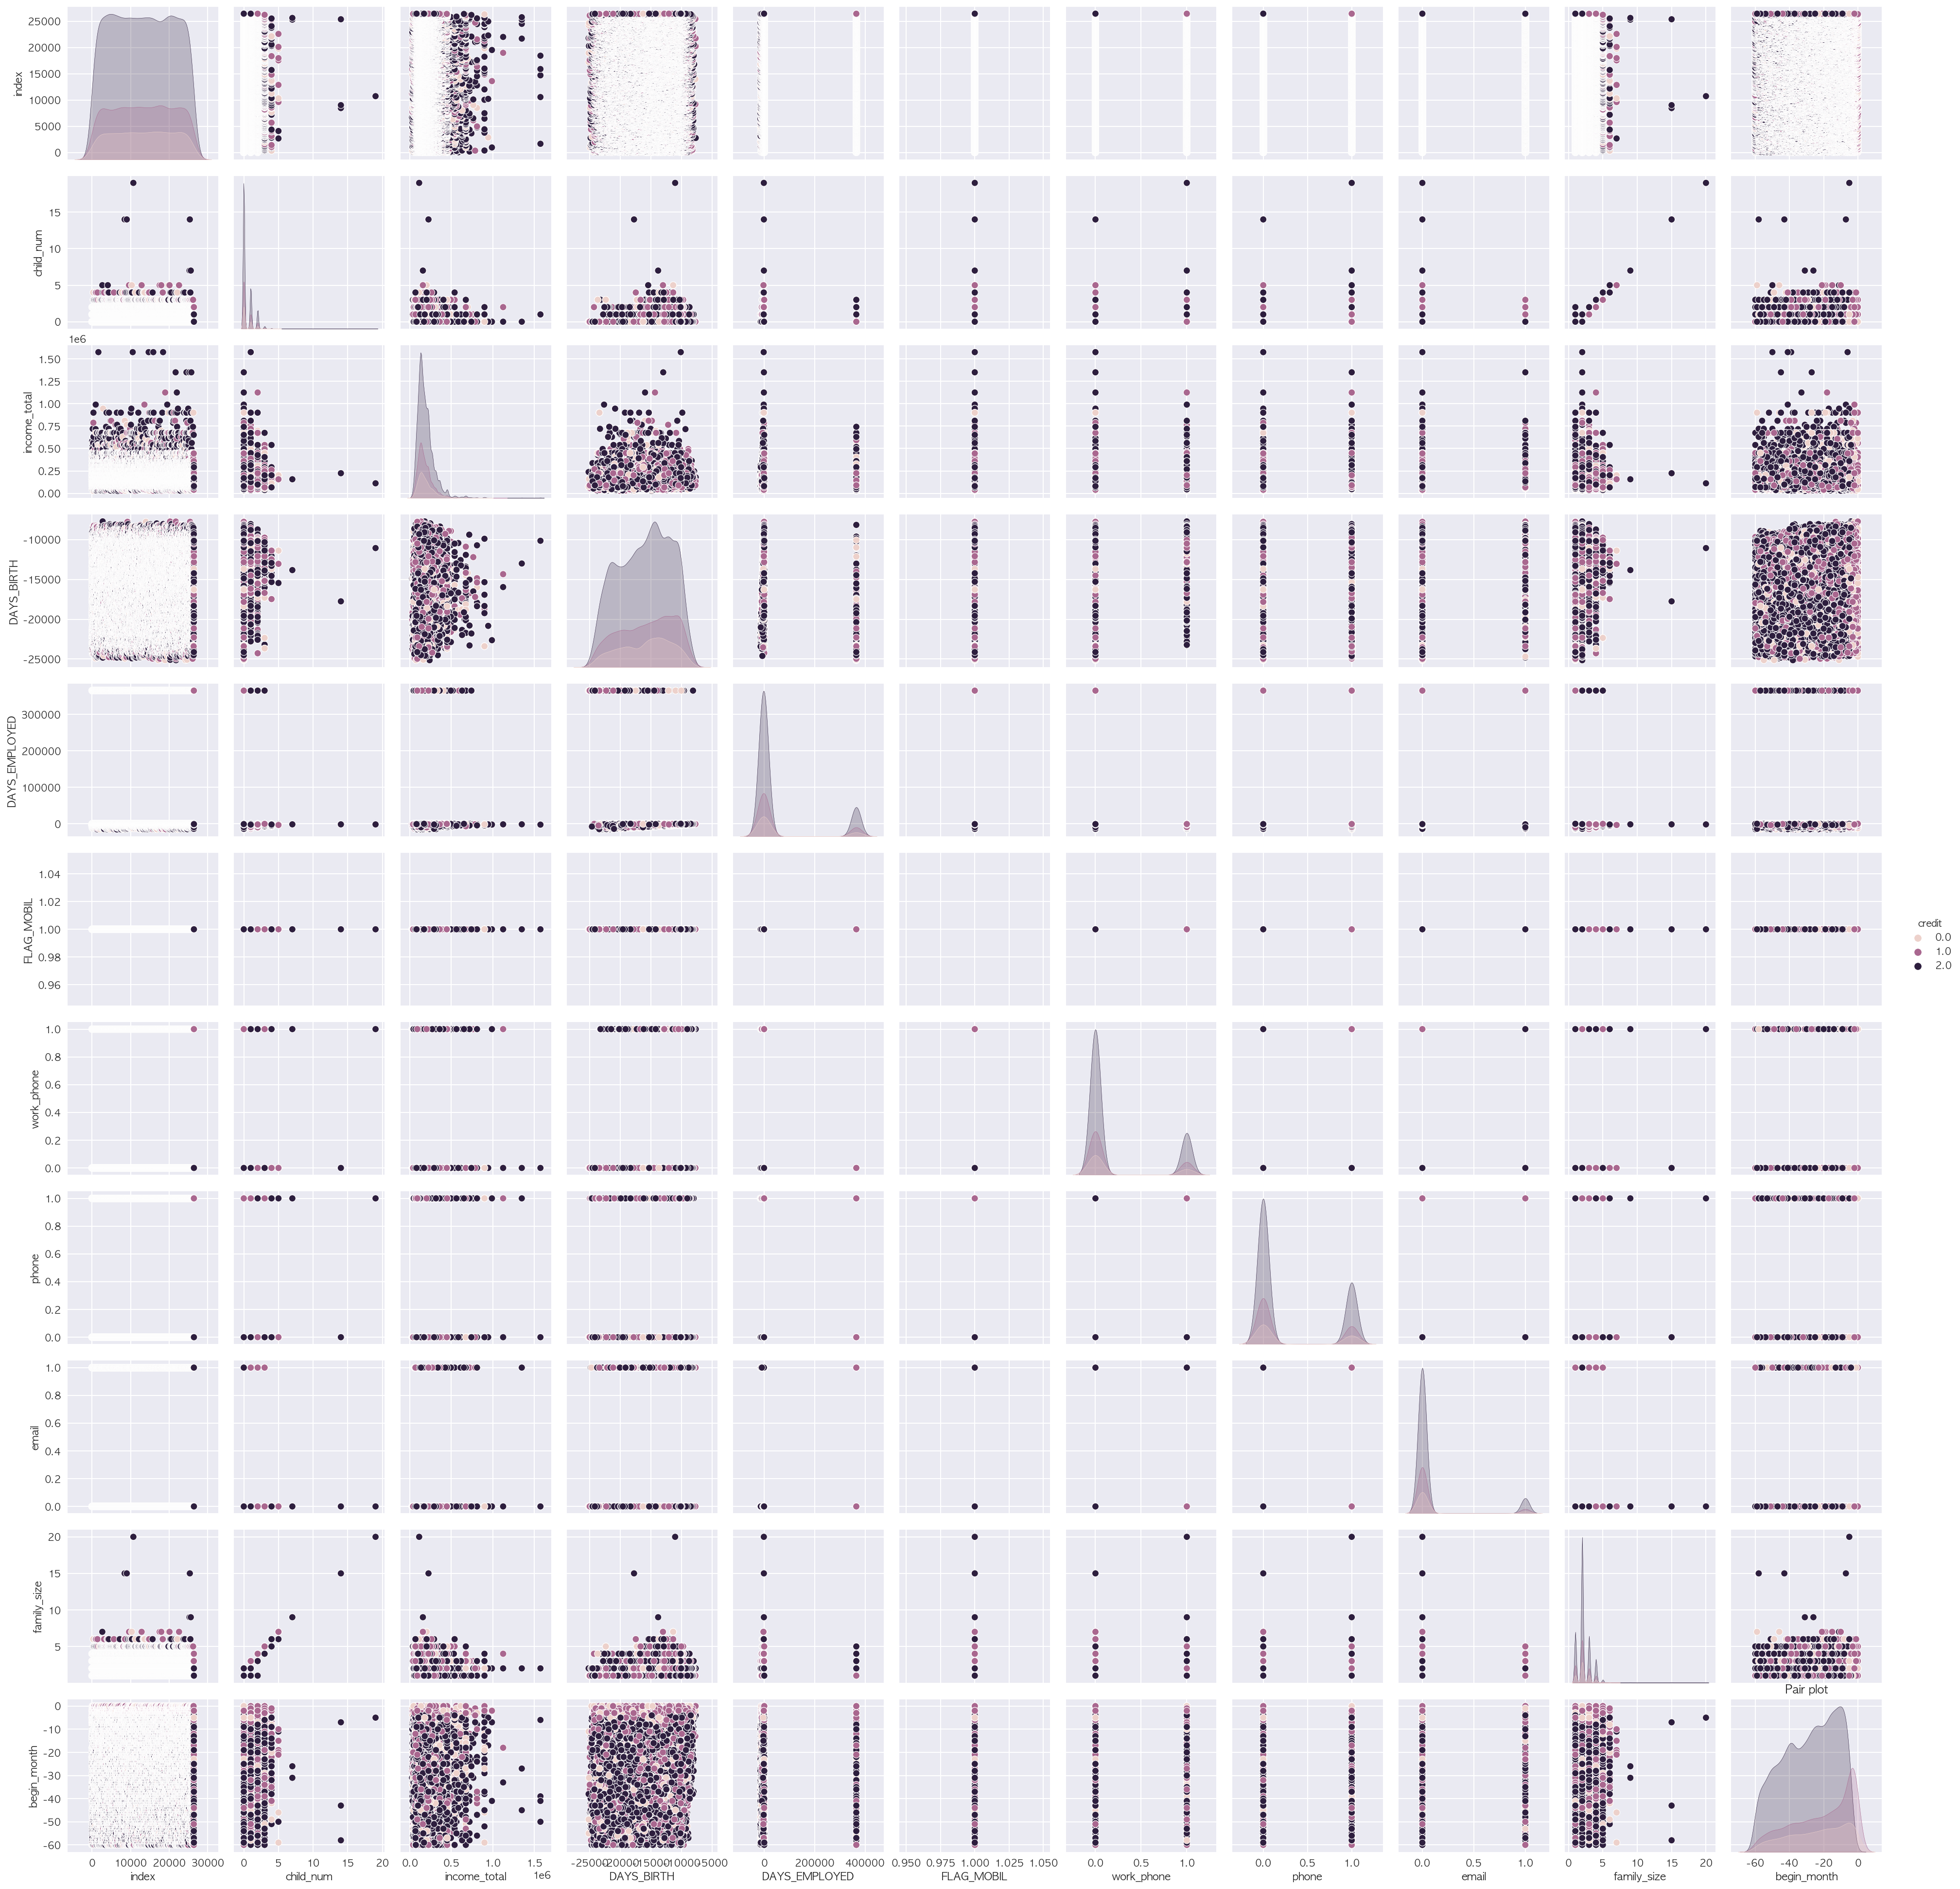

In [5]:
sns.pairplot(df, hue='credit')
plt.title('Pair plot')
plt.savefig('graphs/pairplot')
plt.show()

In [3]:
data = pd.read_csv('credit_data/analysis_data.csv')
data.head()

index gender car reality  child_num  income_total           income_type  \
0      1      F   N       Y          1        247500  Commercial associate   
1      2      M   Y       Y          0        450000               Working   
2      3      F   N       Y          0        202500  Commercial associate   
3      4      F   Y       Y          0        157500         State servant   
4      5      F   N       Y          2        270000               Working   

                        edu_type     family_type         house_type  age  \
0  Secondary / secondary special  Civil marriage  House / apartment   31   
1               Higher education         Married  House / apartment   52   
2  Secondary / secondary special         Married  House / apartment   41   
3               Higher education         Married  House / apartment   41   
4  Secondary / secondary special         Married  House / apartment   36   

   employed_year  work_phone  phone  email             occyp_type  \
0              4           0      0      1               Laborers   
1             12           0      1      0               Managers   
2              5           0      1      0            Sales staff   
3              5           0      0      0               Managers   
4             13           0      0      1  High skill tech staff   

   family_size  begin_month  credit  
0            3            5       1  
1            2           22       2  
2            2           37       0  
3            2           26       2  
4            4           18       1

F    17697
M     8760
Name: gender, dtype: int64


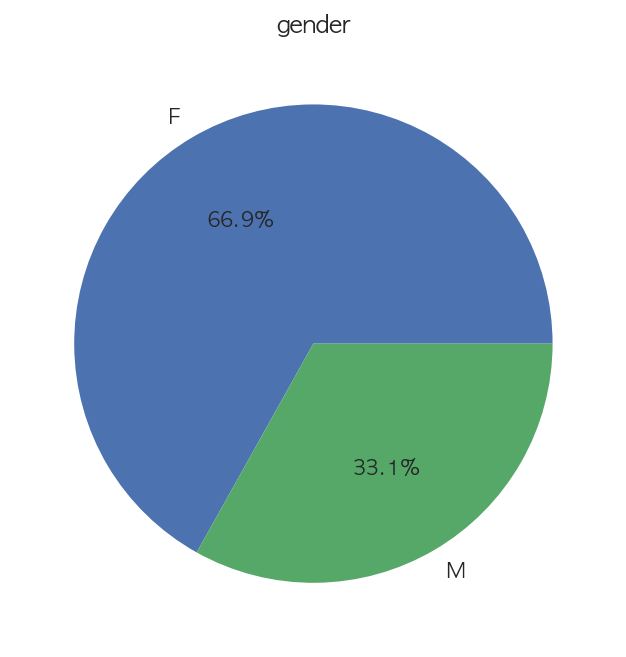

In [25]:
column = 'gender'
value_counts = df[column].value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

N    16410
Y    10047
Name: car, dtype: int64


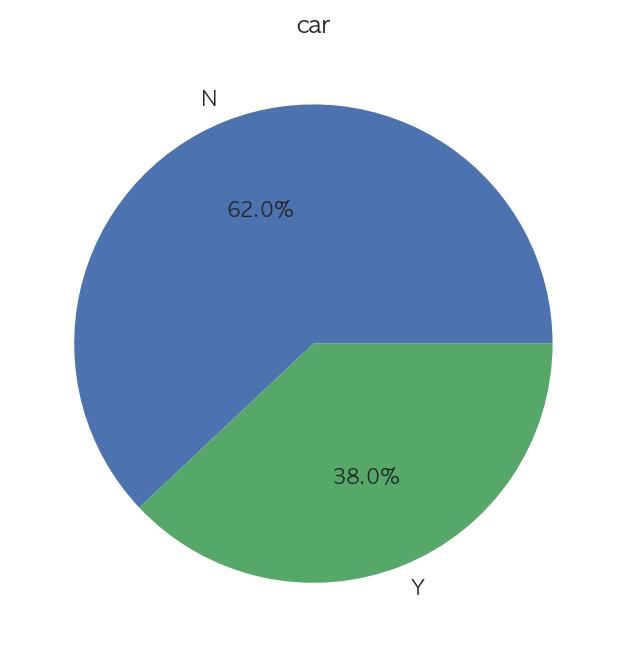

In [26]:
column = 'car'
value_counts = df[column].value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

Y    17830
N     8627
Name: reality, dtype: int64


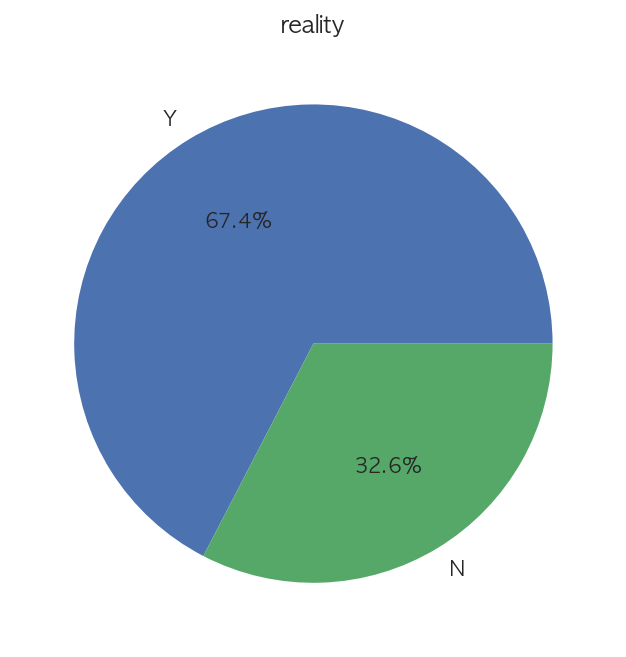

In [27]:
column = 'reality'
value_counts = df[column].value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64


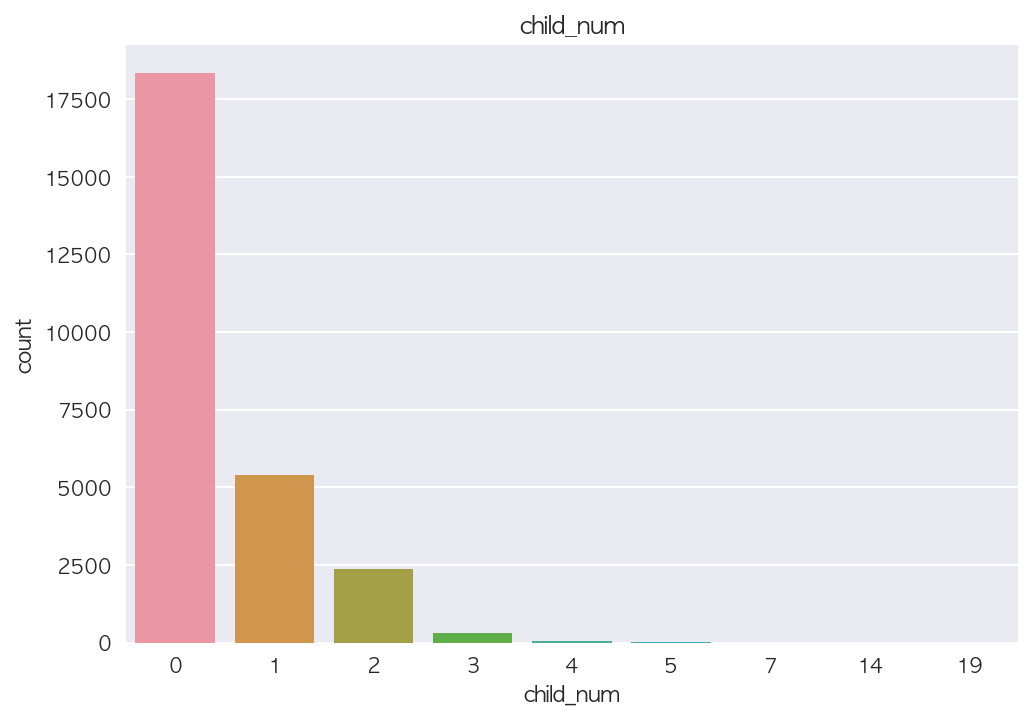

In [29]:
column = 'child_num'
print(df[column].value_counts())
sns.countplot(data=df, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

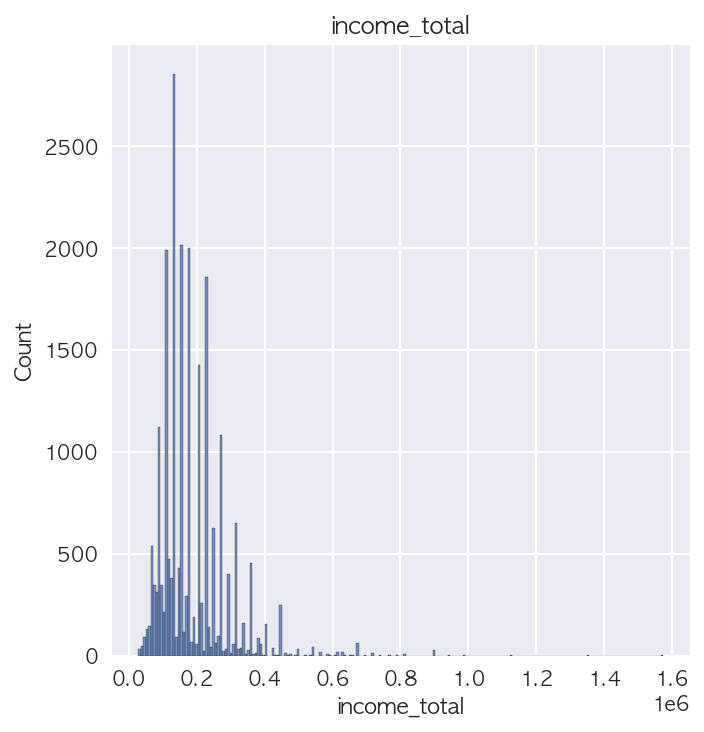

In [11]:
column = 'income_total'
sns.displot(data=data, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64


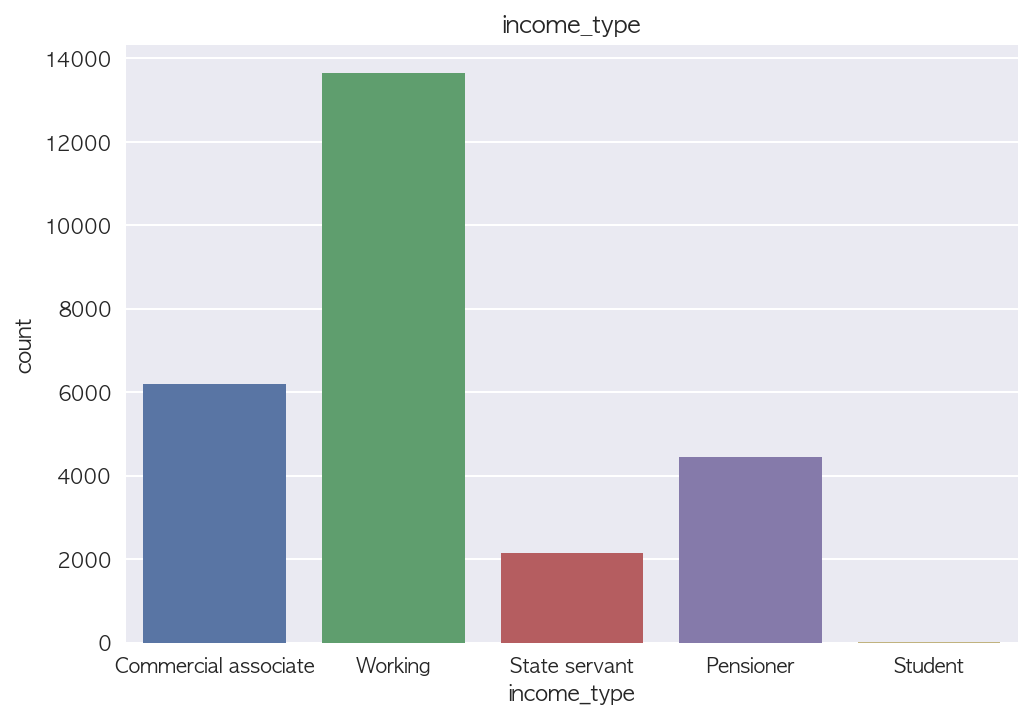

In [12]:
column = 'income_type'
print(df[column].value_counts())
sns.countplot(data=df, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

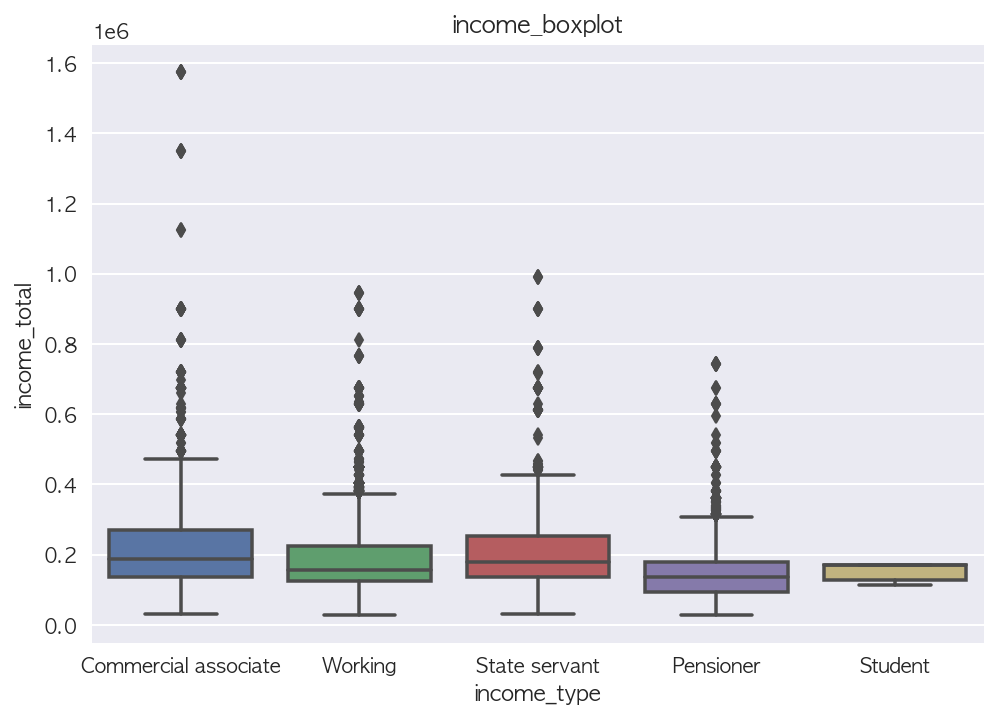

In [13]:
columns = ['income_type','income_total']
title = 'income_boxplot'
sns.boxplot(data=data, x=columns[0], y=columns[1])
plt.title(title)
plt.savefig(f'graphs/eda/{title}')
plt.show()

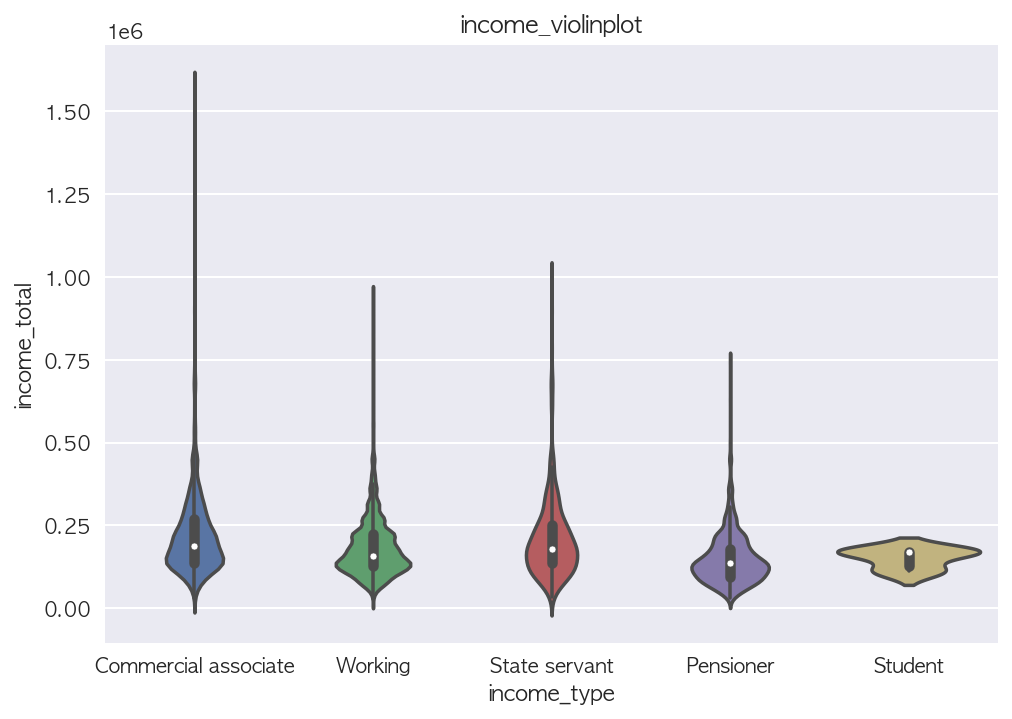

In [14]:
columns = ['income_type','income_total']
title = 'income_violinplot'
sns.violinplot(data=data, x=columns[0], y=columns[1])
plt.title(title)
plt.savefig(f'graphs/eda/{title}')
plt.show()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64


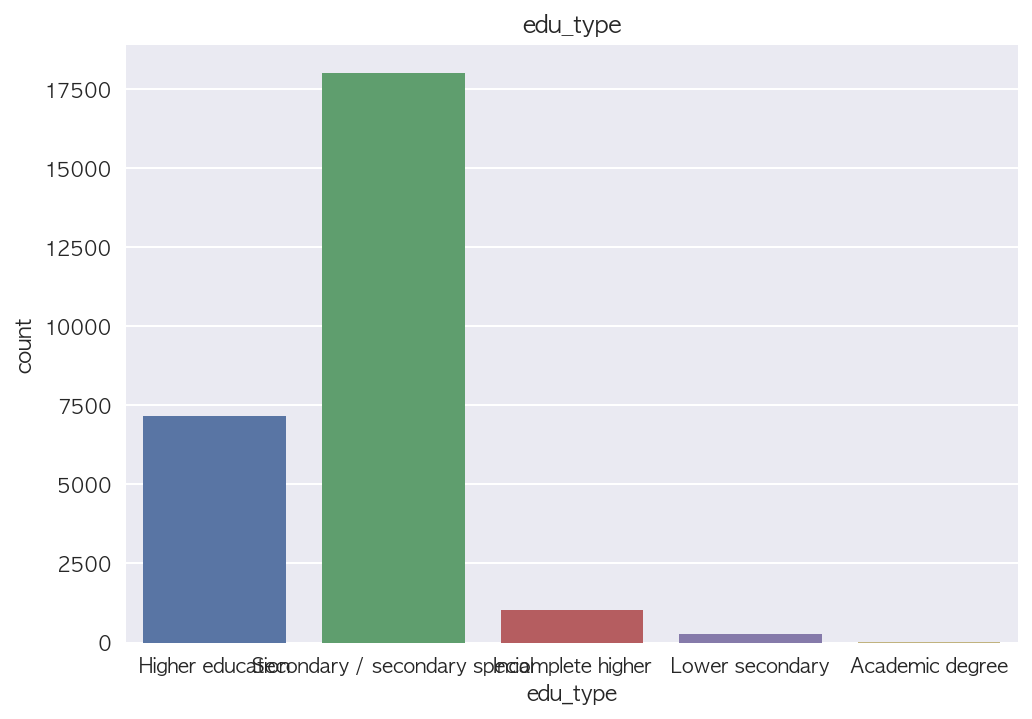

In [15]:
column = 'edu_type'
print(df[column].value_counts())
sns.countplot(data=df, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64


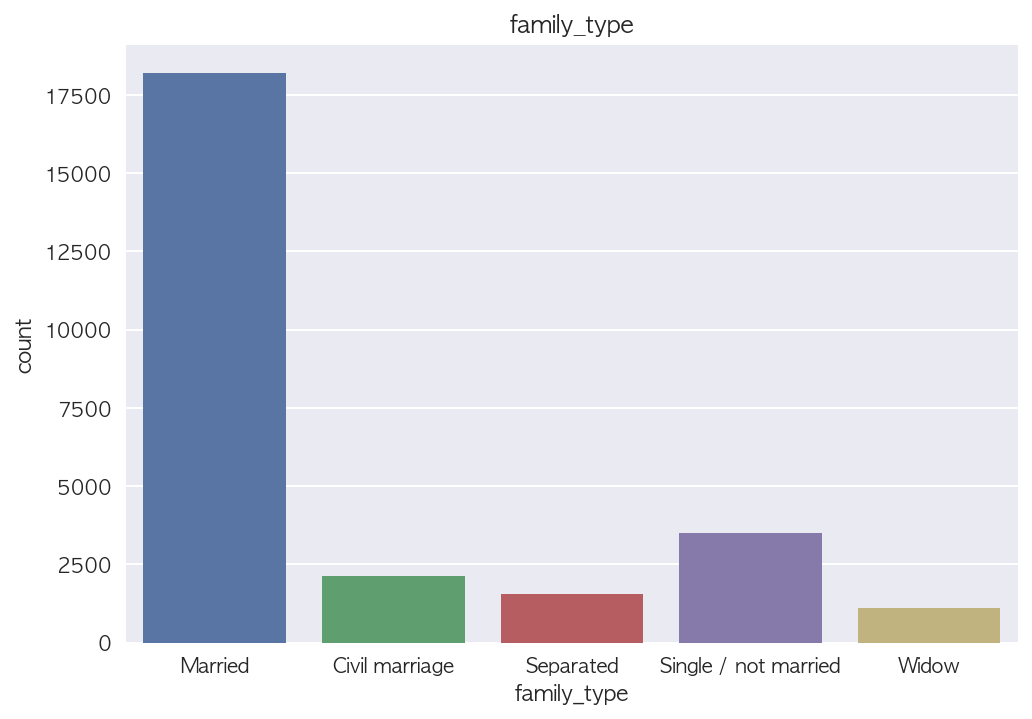

In [16]:
column = 'family_type'
print(df[column].value_counts())
sns.countplot(data=df, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64


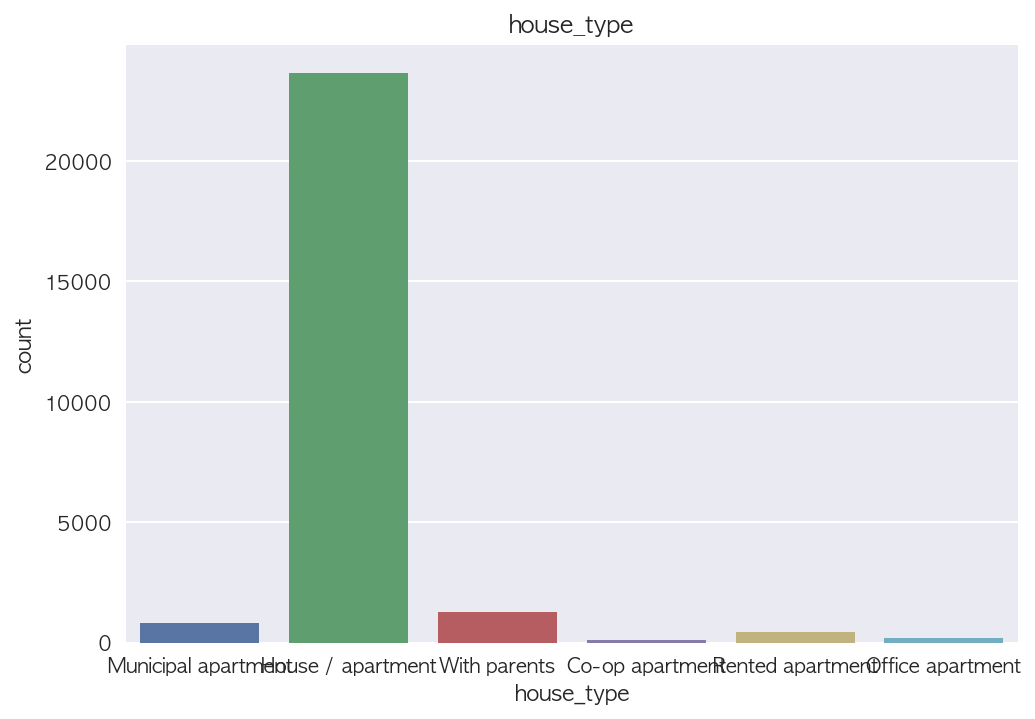

In [17]:
column = 'house_type'
print(df[column].value_counts())
sns.countplot(data=df, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

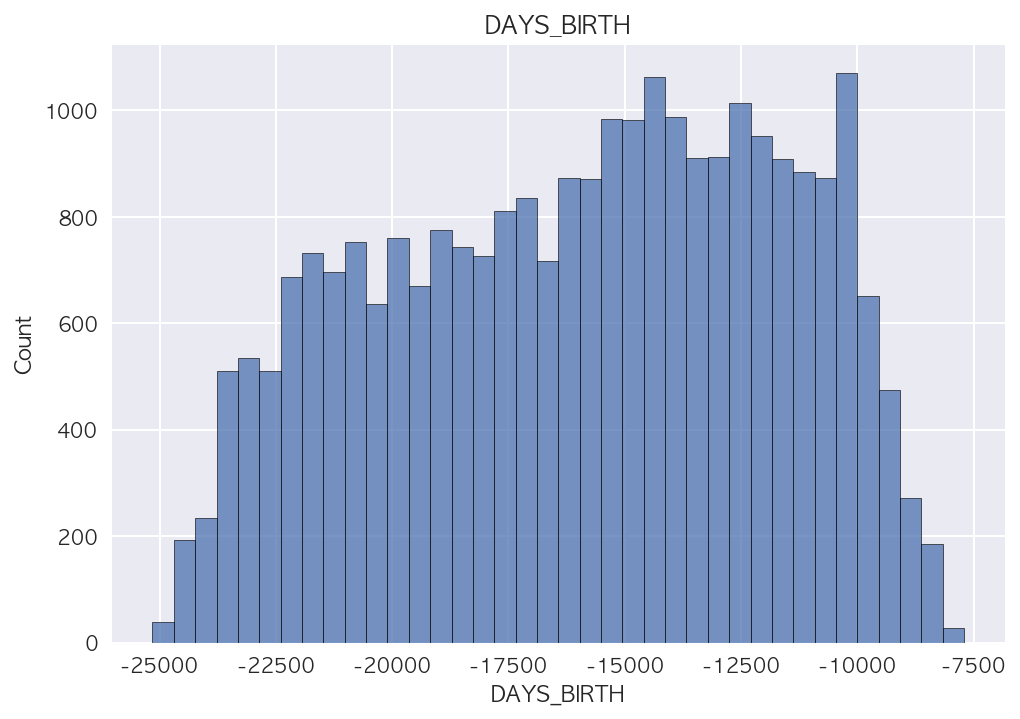

In [18]:
column = 'DAYS_BIRTH'
sns.histplot(data=df, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

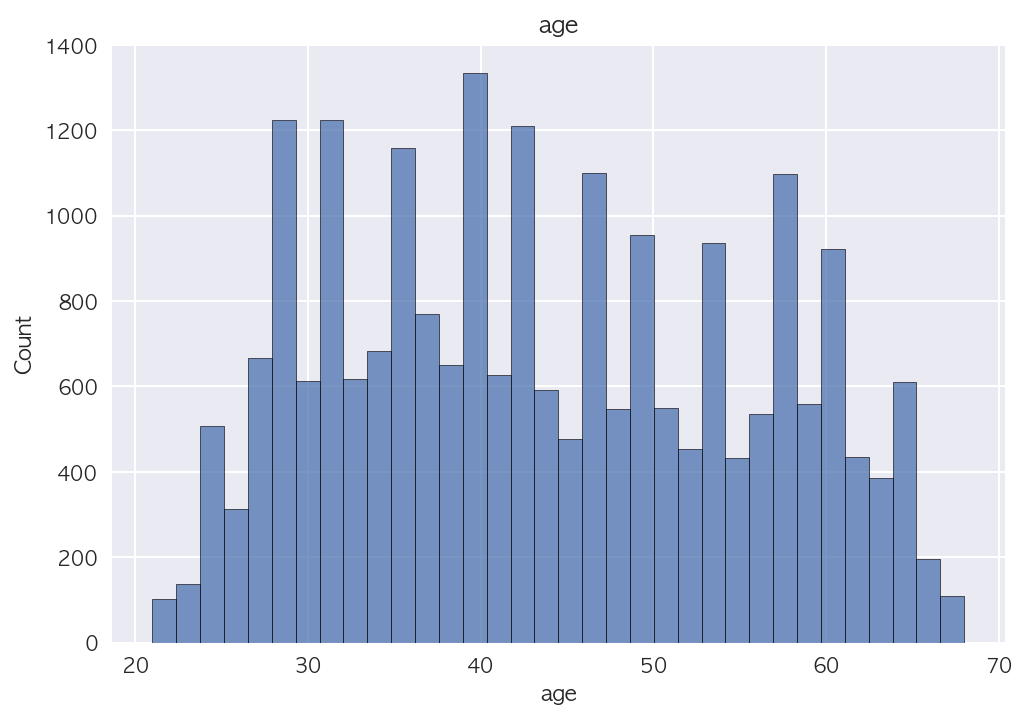

In [19]:
column = 'age'
sns.histplot(data=data, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


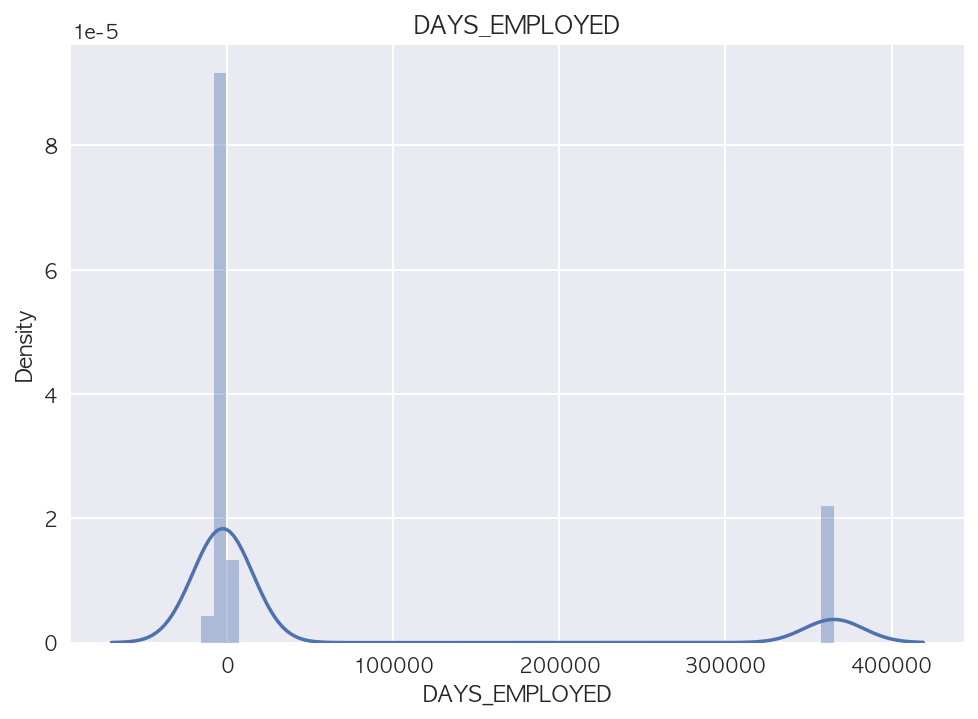

In [20]:
column = 'DAYS_EMPLOYED'
sns.distplot(df[column])
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

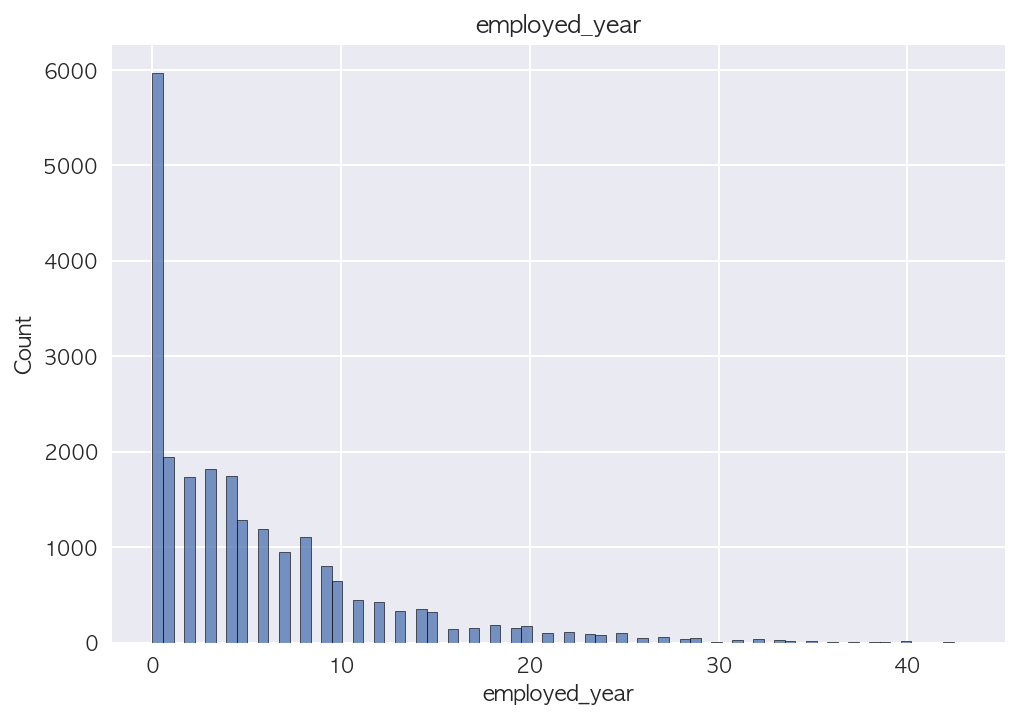

In [21]:
column = 'employed_year'
sns.histplot(data=data, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

T    26457
Name: FLAG_MOBIL, dtype: int64


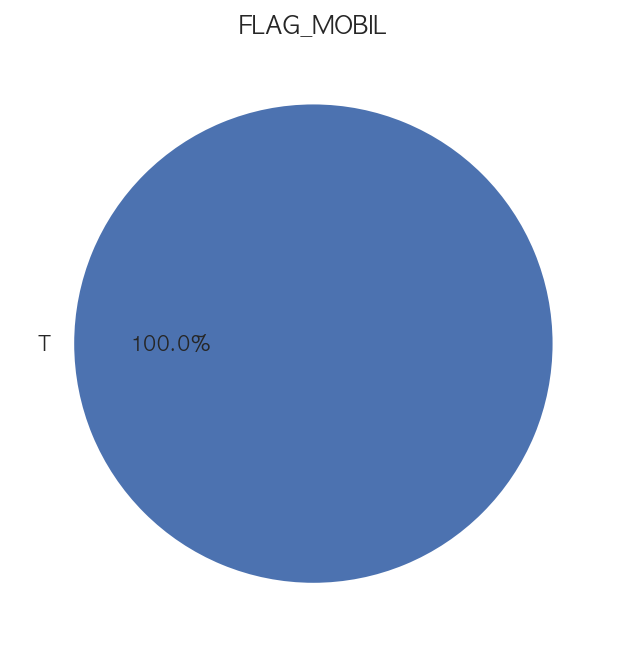

In [37]:
column = 'FLAG_MOBIL'
value_counts = df[column].replace({0:'F',1:'T'}).value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

F    20511
T     5946
Name: work_phone, dtype: int64


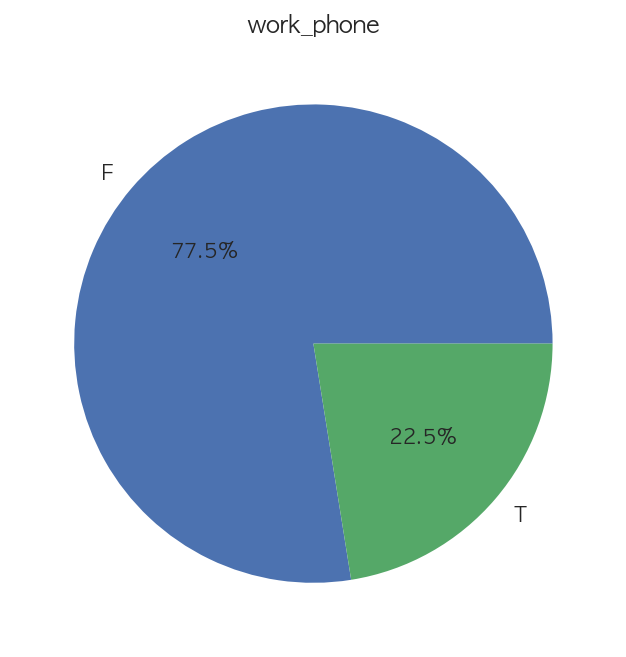

In [38]:
column = 'work_phone'
value_counts = df[column].replace({0:'F',1:'T'}).value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

F    18672
T     7785
Name: phone, dtype: int64


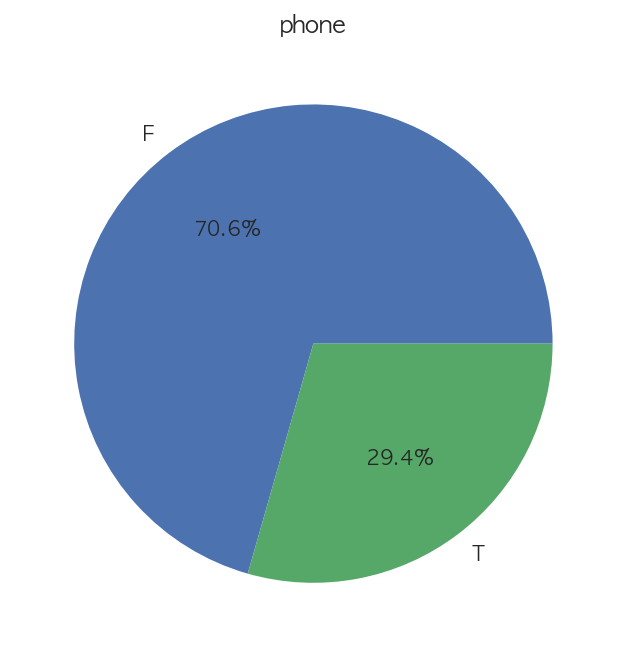

In [39]:
column = 'phone'
value_counts = df[column].replace({0:'F',1:'T'}).value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

F    24042
T     2415
Name: email, dtype: int64


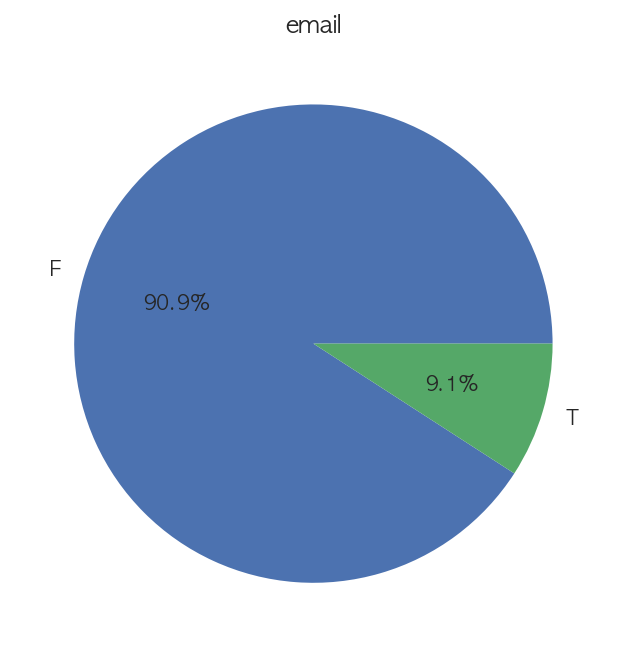

In [40]:
column = 'email'
value_counts = df[column].replace({0:'F',1:'T'}).value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64


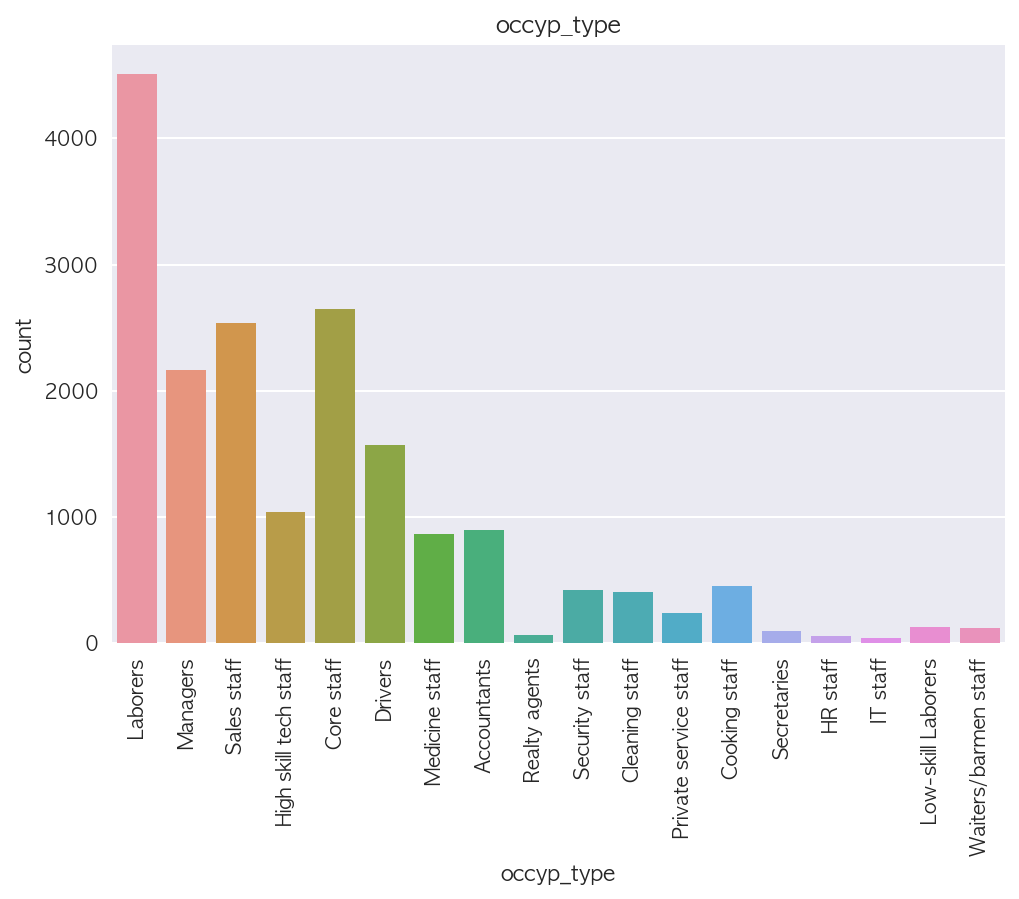

In [26]:
column = 'occyp_type'
print(df[column].value_counts())
plot = sns.countplot(data=df, x=column)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64


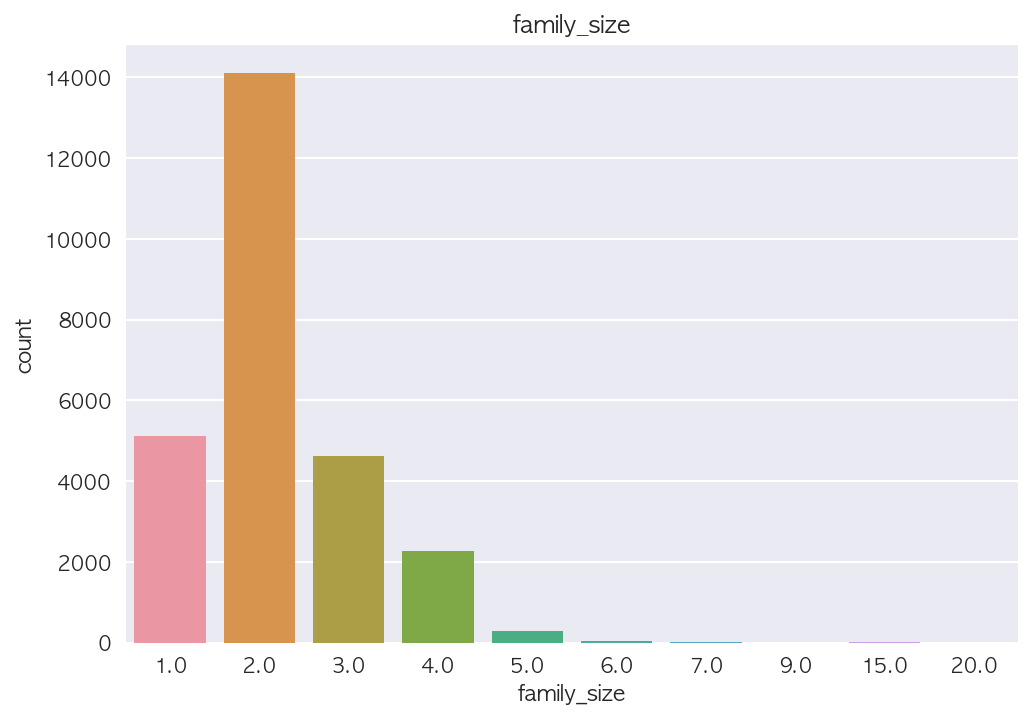

In [27]:
column = 'family_size'
print(df[column].value_counts())
sns.countplot(data=df, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

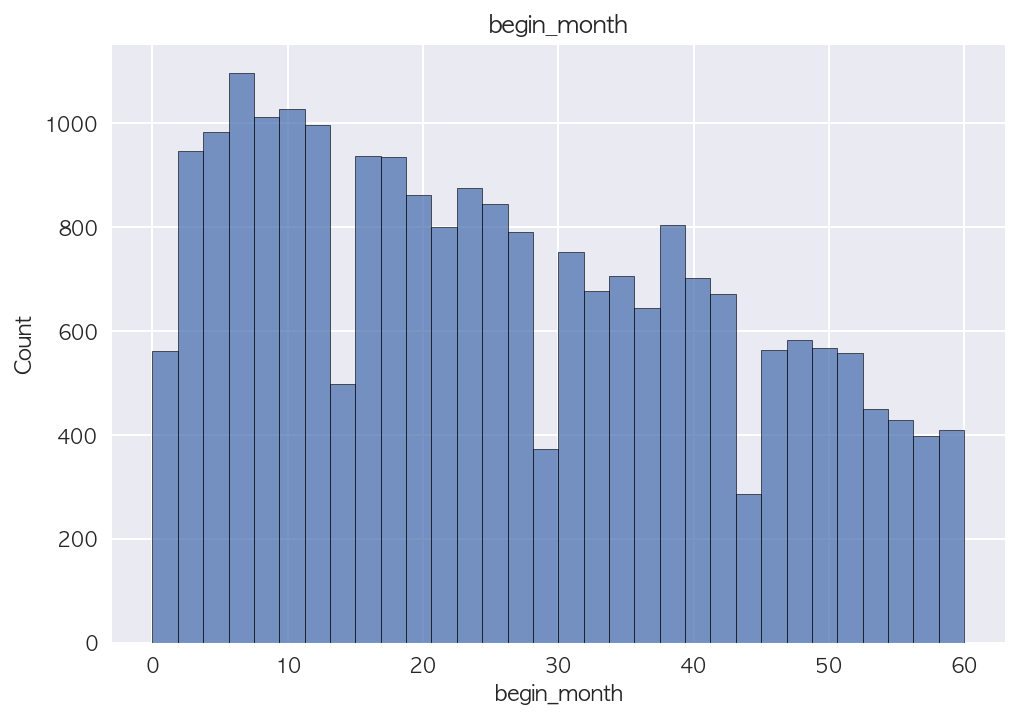

In [28]:
column = 'begin_month'
sns.histplot(data=data, x=column)
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()

2    16968
1     6267
0     3222
Name: credit, dtype: int64


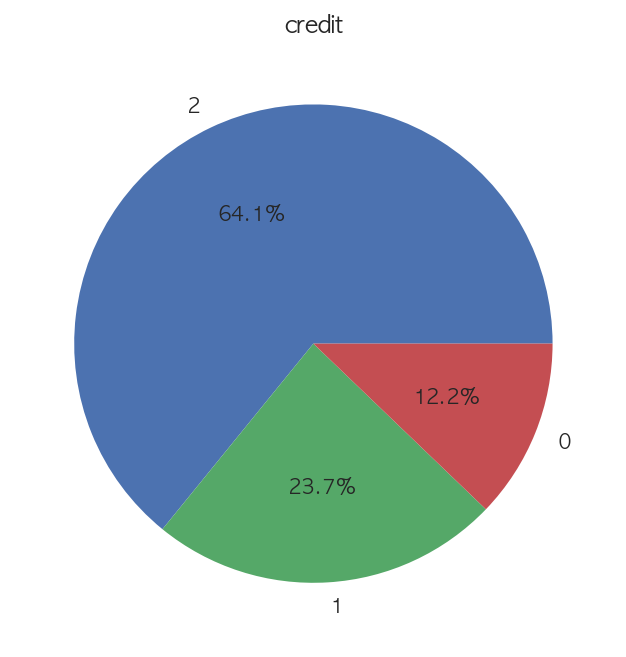

In [41]:
column = 'credit'
value_counts = df[column].astype(int).value_counts()
print(value_counts)
plt.pie(x=value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(column)
plt.savefig(f'graphs/eda/{column}')
plt.show()